## Used to make Screenshot for the ppt presentation

Presentation LLMs a Deep Dive into the mechanic found at https://ioskn.github.io/bbs/

##### Prompting
 
<small>
I want to explain the attention mechanism in LLM and came up with the following story

An example: Emma hates games but she is a  great friend
Imaging the network at a stage where it has to figure out (among other thinks) the relationships of objects
This could be done in the following space
Dim1:	Score that the word is a person
Dim2: 	Score that the word is animal
Dim3: 	Score that the word is a noun
Dim4: 	Score that the word is an adjectiv
Examples 
Emma k_1=(1.2, 0.8, 1.0,−2) this is called a key
Now, we take the word friend, the word itself might be (1.0.,0.9, 1.0,−2) but it’s better to ask to what friend should look at (persons, animals and adjectives). This is the query q_9=(1.0,0.9, 0,1) 
We get to the space via
𝑘_𝑗=𝑊^𝐾 𝑥_𝑗
𝑞_𝑖=𝑊^𝑄 𝑥_𝑖
The similarity between 𝑖 and 𝑗 is the dot-product between 𝑞_𝑖 and 𝑘_𝑖
For q_9,〖 k〗_1=1.2∗1+0.8∗0.9+1.0∗0+(−2)∗1

Can you give me plausible examples for the keys and values of that sentence, besides the one I provided.
</small>

In [17]:
# Importing the required libraries
import numpy as np
import pandas as pd

# Defining the keys and queries dictionaries
keys = {
    'Emma': np.array([1.2, 0.8, 1.0, 0]),
    'hates': np.array([0, 0, -0.5, 0]),
    'games': np.array([0, 0, 1.0, -1]),
    'but': np.array([0, 0, -1, 0]),
    'she': np.array([1.0, 0.0, 0, -1]),
    'is': np.array([0, 0, -0.5, 0]),
    'a': np.array([0, 0, -1, 0]),
    'great': np.array([0, 0, -1, 1.2]),
    'friend': np.array([0,0, 1.0,0]) # The word friend is not a person or an animal
}

queries = {
    'Emma': np.array([1.1, 0.7, 0.9, 0]),
    'hates': np.array([0, 0, 1, 0]),
    'games': np.array([0, 0, 1, 0]),
    'but': np.array([0, 0, 0, 0]),
    'she': np.array([1.1, 0, 0, -1]),
    'is': np.array([0, 0, 0, 0]),
    'a': np.array([0.2, 0, 1, 0.5]),
    'great': np.array([0.5, 0, 1, 0]),
    'friend': np.array([1, 0.9, 0.5, 1])
}

# Create a DataFrame to display the queries
df_queries = pd.DataFrame.from_dict(queries, orient='index', columns=['Pers', 'Anim', 'Noun', 'Adj'])
#df_queries.index.name = 'Queries'
# Display the DataFrame
df_queries

,Pers,Anim,Noun,Adj
Emma,1.1,0.7,0.9,0.0
hates,0.0,0.0,1.0,0.0
games,0.0,0.0,1.0,0.0
but,0.0,0.0,0.0,0.0
she,1.1,0.0,0.0,-1.0
is,0.0,0.0,0.0,0.0
a,0.2,0.0,1.0,0.5
great,0.5,0.0,1.0,0.0
friend,1.0,0.9,0.5,1.0


In [18]:
df_keys = pd.DataFrame.from_dict(keys, orient='index', columns=['Pers', 'Anim', 'Noun', 'Adj'])
df_keys.T

,Emma,hates,games,but,she,is,a,great,friend
Pers,1.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Anim,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Noun,1.0,-0.5,1.0,-1.0,0.0,-0.5,-1.0,-1.0,1.0
Adj,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,1.2,0.0


In [19]:
K = np.array(list(keys.values())).T
Q = np.array(list(queries.values())).T
#1.1*1.2 + 0.7*0.8 + 0.9*1.0 + (-1.9)*(-2) #elememt (1,1)
#element (9,1)
1.1*1.0 + 0.7*0.8 + 0.9*1.0 + (-1.9)*(0) #elememt (1,1)

1.0*1.2 + 0.9*0.8 + 0.5 * 1 + 1.0*0

2.42

In [20]:
#(Q.T @ K)
Q.T @ K
pd.DataFrame(Q.T @ K, columns=df_queries.index, index=df_keys.index)

,Emma,hates,games,but,she,is,a,great,friend
Emma,2.78,-0.45,0.9,-0.9,1.1,-0.45,-0.9,-0.9,0.9
hates,1.00,-0.50,1.0,-1.0,0.0,-0.50,-1.0,-1.0,1.0
games,1.00,-0.50,1.0,-1.0,0.0,-0.50,-1.0,-1.0,1.0
but,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
she,1.32,0.00,1.0,0.0,2.1,0.00,0.0,-1.2,0.0
is,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
a,1.24,-0.50,0.5,-1.0,-0.3,-0.50,-1.0,-0.4,1.0
great,1.60,-0.50,1.0,-1.0,0.5,-0.50,-1.0,-1.0,1.0
friend,2.42,-0.25,-0.5,-0.5,0.0,-0.25,-0.5,0.7,0.5


In [21]:
Q

array([[ 1.1,  0. ,  0. ,  0. ,  1.1,  0. ,  0.2,  0.5,  1. ],
       [ 0.7,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.9],
       [ 0.9,  1. ,  1. ,  0. ,  0. ,  0. ,  1. ,  1. ,  0.5],
       [ 0. ,  0. ,  0. ,  0. , -1. ,  0. ,  0.5,  0. ,  1. ]])

In [22]:
# Computing the similarity matrix
wtilde = np.einsum('if,it->ft', Q,K)
wtilde

array([[ 2.78, -0.45,  0.9 , -0.9 ,  1.1 , -0.45, -0.9 , -0.9 ,  0.9 ],
       [ 1.  , -0.5 ,  1.  , -1.  ,  0.  , -0.5 , -1.  , -1.  ,  1.  ],
       [ 1.  , -0.5 ,  1.  , -1.  ,  0.  , -0.5 , -1.  , -1.  ,  1.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 1.32,  0.  ,  1.  ,  0.  ,  2.1 ,  0.  ,  0.  , -1.2 ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 1.24, -0.5 ,  0.5 , -1.  , -0.3 , -0.5 , -1.  , -0.4 ,  1.  ],
       [ 1.6 , -0.5 ,  1.  , -1.  ,  0.5 , -0.5 , -1.  , -1.  ,  1.  ],
       [ 2.42, -0.25, -0.5 , -0.5 ,  0.  , -0.25, -0.5 ,  0.7 ,  0.5 ]])

In [23]:
def softmax(z, axis=-1):
    exp_z = np.exp(z)  # Subtract max for numerical stability
    sum_exp_z = np.sum(exp_z, axis=axis, keepdims=True)
    softmax_output = exp_z / sum_exp_z
    return softmax_output

In [24]:
w = softmax(wtilde)
np.round(w, 2)
pd.DataFrame(np.round(w, 2), columns=df_queries.index, index=df_keys.index)

,Emma,hates,games,but,she,is,a,great,friend
Emma,0.61,0.02,0.09,0.02,0.11,0.02,0.02,0.02,0.09
hates,0.24,0.05,0.24,0.03,0.09,0.05,0.03,0.03,0.24
games,0.24,0.05,0.24,0.03,0.09,0.05,0.03,0.03,0.24
but,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11
she,0.19,0.05,0.14,0.05,0.41,0.05,0.05,0.02,0.05
is,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11
a,0.31,0.05,0.15,0.03,0.07,0.05,0.03,0.06,0.24
great,0.35,0.04,0.19,0.03,0.11,0.04,0.03,0.03,0.19
friend,0.58,0.04,0.03,0.03,0.05,0.04,0.03,0.10,0.09


In [25]:
m = Q.shape[0]
wtilde = np.einsum('if,it->ft', Q,K)
T = wtilde.shape[0]
for i in range(0,T):
    for j in range(i+1, T):
        wtilde[i,j] = -np.inf
w = softmax(wtilde/np.sqrt(m))
pd.DataFrame(np.round(w, 2), columns=df_queries.index, index=df_keys.index)

,Emma,hates,games,but,she,is,a,great,friend
Emma,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
hates,0.68,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00
games,0.40,0.19,0.40,0.00,0.00,0.00,0.00,0.00,0.00
but,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,0.00
she,0.23,0.12,0.20,0.12,0.34,0.00,0.00,0.00,0.00
is,0.17,0.17,0.17,0.17,0.17,0.17,0.00,0.00,0.00
a,0.27,0.11,0.19,0.09,0.13,0.11,0.09,0.00,0.00
great,0.26,0.09,0.19,0.07,0.15,0.09,0.07,0.07,0.00
friend,0.30,0.08,0.07,0.07,0.09,0.08,0.07,0.13,0.12


#### Below unfinished 
This should create visual representation of the (T,C) tensors

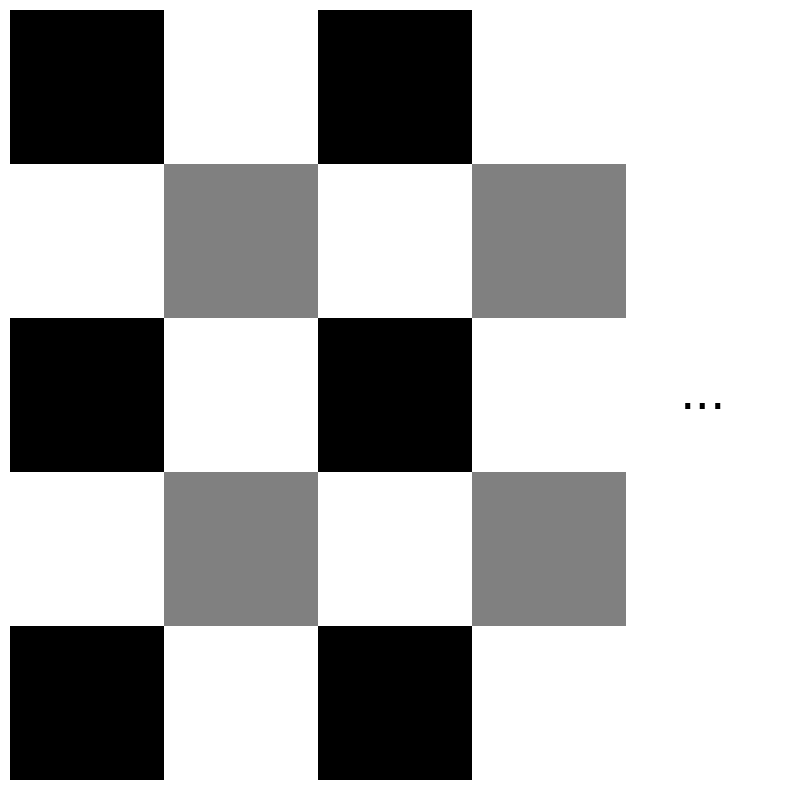

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def create_image(matrix):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Set the aspect of the plot to be equal, so the boxes appear as squares
    ax.set_aspect('equal')
    ax.axis('off')  # Turn off the axis

    rect_width = 0.2
    rect_height = 0.2

    # Iterate over the patterns and create rectangles for the first 4 columns
    for i in range(matrix.shape[0]):
        for j in range(4):  # Only first 4 columns
            grayscale_value = matrix[i, j]
            ax.add_patch(patches.Rectangle((j*rect_width, i*rect_height), rect_width, rect_height, 
                                           facecolor=str(grayscale_value)))

    # Adding the large ellipsis (dots) after 4th column
    ax.text(4.5 * rect_width, 2.5 * rect_height, "...", fontsize=35, va='center', ha='center')

    # Create rectangles for the last column after the ellipsis
    for i in range(matrix.shape[0]):
        grayscale_value = matrix[i, -1]
        ax.add_patch(patches.Rectangle((5.7*rect_width, i*rect_height), rect_width, rect_height, 
                                       facecolor=str(grayscale_value)))

    # Save the figure
    plt.tight_layout()
    plt.savefig('final_greyscale_pattern_image.png', dpi=300, bbox_inches='tight')
    plt.show()

# Example matrix
matrix = np.array([
    [0, 1, 0, 1, 0],
    [1, 0.5, 1, 0.5, 1],
    [0, 1, 0, 1, 0],
    [1, 0.5, 1, 0.5, 1],
    [0, 1, 0, 1, 0]
])
create_image(matrix)
